# Exploratory data analysis

In [1]:
# !pip install -r requirements.txt

In [2]:
import pandas as pd

In [3]:
data_frame = pd.read_csv('text copy.csv')

In [4]:
data_frame['label']

,label
0,4
1,0
2,4
3,0
4,4
...,...
416804,2
416805,3
416806,5
416807,3


In [5]:
data_frame.head()

,Unnamed: 0,text,label
0,0,i just feel really helpless and heavy hearted,4
1,1,ive enjoyed being able to slouch about relax a...,0
2,2,i gave up my internship with the dmrg and am f...,4
3,3,i dont know i feel so lost,0
4,4,i am a kindergarten teacher and i am thoroughl...,4


* Note: 0 = sad, 1 = joy, 2 = love, 3 = anger, 4 = fear, 5 = suprise

Before spliting dataset, we need to check the distribution of the 'label' column

In [6]:
data_frame.label.value_counts()

,count
label,
1,141067
0,121187
3,57317
4,47712
2,34554
5,14972


In [7]:
del data_frame['Unnamed: 0']

In [8]:
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns; sns.set_theme()
import warnings; warnings.filterwarnings('ignore')
from wordcloud import WordCloud, STOPWORDS
import numpy as np

In [9]:
all_labels = Counter(data_frame.label)
all_labels.most_common()

[(1, 141067), (0, 121187), (3, 57317), (4, 47712), (2, 34554), (5, 14972)]

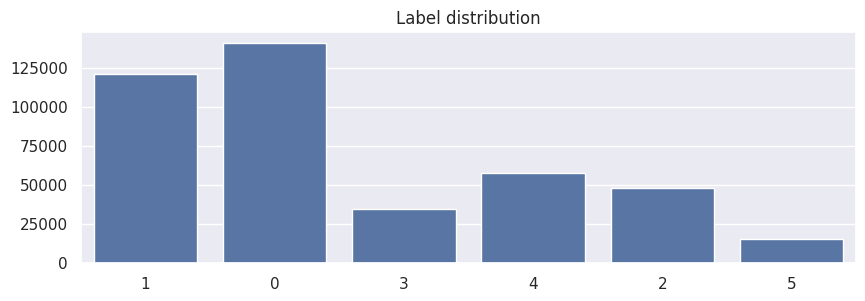

In [10]:
labels, label_counts = zip(*all_labels.most_common())
plt.figure(figsize=(10,3))
ax = sns.barplot(x=list(labels), y=list(label_counts))
ax.set_xticklabels(labels, rotation=0)
plt.title('Label distribution')
plt.show()

In [11]:
for i in range(11):
    label_0_indices = data_frame[data_frame['label'] == 0].index
    label_1_indices = data_frame[data_frame['label'] == 1].index

    drop_0_indices = np.random.choice(label_0_indices, size=round(len(label_0_indices)/6), replace=False)
    drop_1_indices = np.random.choice(label_1_indices, size=round(len(label_1_indices)/6), replace=False)

    new_df = data_frame.drop(index=np.concatenate([drop_0_indices, drop_1_indices]))
    data_frame = new_df

In [12]:
for i in range(10):
    label_0_indices = data_frame[data_frame['label'] == 0].index
    label_1_indices = data_frame[data_frame['label'] == 1].index
    label_2_indices = data_frame[data_frame['label'] == 2].index
    label_3_indices = data_frame[data_frame['label'] == 3].index
    label_4_indices = data_frame[data_frame['label'] == 4].index
    label_5_indices = data_frame[data_frame['label'] == 5].index

    drop_0_indices = np.random.choice(label_0_indices, size=round(len(label_0_indices)/8), replace=False)
    drop_1_indices = np.random.choice(label_1_indices, size=round(len(label_1_indices)/8), replace=False)
    drop_2_indices = np.random.choice(label_2_indices, size=round(len(label_2_indices)/6), replace=False)
    drop_3_indices = np.random.choice(label_3_indices, size=round(len(label_3_indices)/5), replace=False)
    drop_4_indices = np.random.choice(label_4_indices, size=round(len(label_4_indices)/5), replace=False)
    drop_5_indices = np.random.choice(label_5_indices, size=round(len(label_5_indices)/10), replace=False)

    new_df = data_frame.drop(index=np.concatenate([drop_0_indices, drop_1_indices, drop_2_indices, drop_3_indices, drop_4_indices, drop_5_indices]))
    data_frame = new_df

In [13]:
len(data_frame)

31365

In [14]:
data_frame.to_csv('text.csv', index=False)

In [15]:
data_frame = pd.read_csv('text.csv')

In [16]:
data_frame

,text,label
0,im forever taking some time out to have a lie ...,5
1,i don t feel submissive and for the time being...,0
2,i was less intelligent and could not really fe...,2
3,i think a guy can make up for lacking funds in...,2
4,i feel my life is totally in ecstatic chaos,1
...,...,...
31360,i marik of course was created from all of mari...,3
31361,i feel so stunned and i feel so stupid,5
31362,i feel like i ve just been stunned,5
31363,i feel like the muscles in and around our eyes...,5


In [17]:
data_frame.label.value_counts()

,count
label,
3,6155
2,5581
5,5221
4,5123
1,4994
0,4291


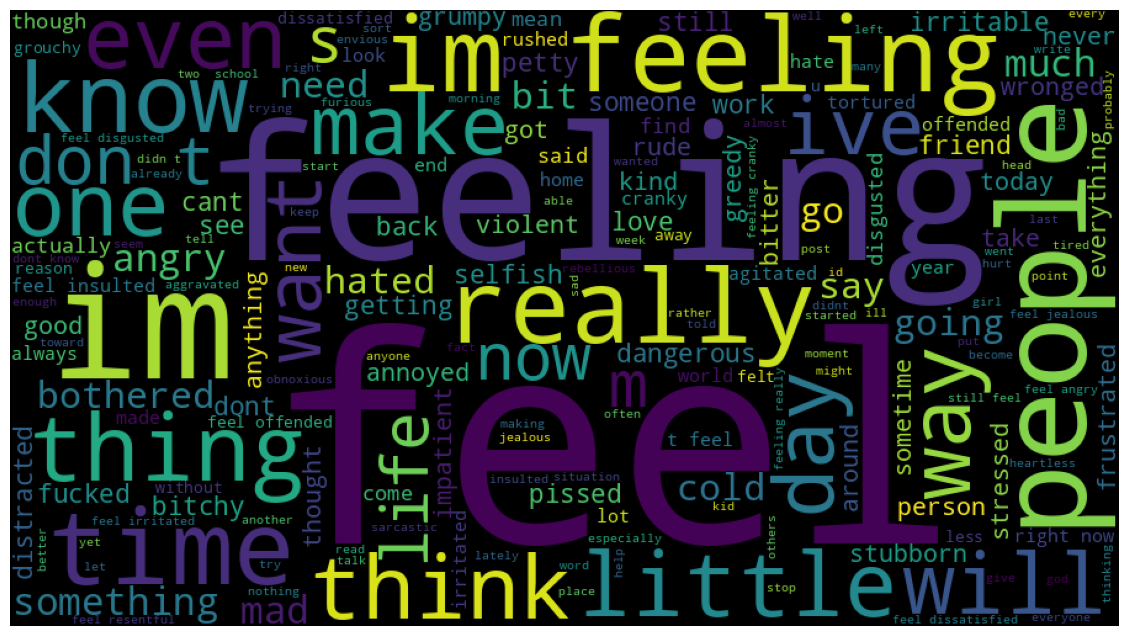

In [18]:
label = 3
plt.figure(figsize=(20,8))
subset = data_frame[data_frame.label == label]
text = subset.text.values
cloud = WordCloud(stopwords=STOPWORDS, background_color='black', collocations=True,
                  width=900, height=500).generate(" ".join(text))
plt.axis("off")
plt.imshow(cloud)

# Data preprocessing

Remove null values if exist

In [19]:
data_frame.isnull().value_counts()

,,count
text,label,
False,False,31365


Remove stopwords

In [20]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import re

In [21]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [22]:
STOPWORDS = stopwords.words('english')

In [23]:
def clean_text(text, stopwords=STOPWORDS):
    # Lower
    text = text.lower()

    # Remove stopwords
    pattern = re.compile(r'\b(' + r'|'.join(stopwords) + r')\b\s*')
    text = pattern.sub("", text)

    # Spacing and filters
    text = re.sub(r"([!\"'#$%&()*\+,-./:;<=>?@\\\[\]^_`{|}~])", r" \1 ", text)
    text = re.sub("[^A-Za-z0-9]+", " ", text)
    text = re.sub(" +", " ", text)
    text = re.sub("http\S+", "", text)

    return text

In [24]:
original_df = data_frame.copy()
data_frame.text = original_df.text.apply(clean_text)
data_frame.text.values[900]

'feeling people probably like change book really liked '

Stemming

In [25]:
def stemmer(text):
    porter_stemmer = nltk.porter.PorterStemmer()
    text = ' '.join([porter_stemmer.stem(word) for word in text.split()])
    return text

In [26]:
data_frame['text'] = data_frame['text'].apply(stemmer)

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
train_df, val_df = train_test_split(data_frame,
                                    test_size=0.2,
                                    stratify=data_frame['label'],
                                    random_state=42)

In [29]:
train_df.label.value_counts()

,count
label,
3,4924
2,4465
5,4177
4,4098
1,3995
0,3433


To check if the data splits have similar distribution, we multiply the value counts of validation_df to 4 (= train size/ validation size)

In [30]:
val_df.label.value_counts() * 4

,count
label,
3,4924
2,4464
5,4176
4,4100
1,3996
0,3432


Since the adjusted value counts of validation_df looks very similar to the value counts of train_df, these two data splits have the same class distribution

TF-IDF

In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [32]:
X = train_df['text']
y = train_df['label']

In [33]:
tf = TfidfVectorizer(min_df=0.0,max_df=1.0,binary=False,ngram_range=(1,3))
tf_train = tf.fit_transform(X)

In [34]:
tf_train

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 624472 stored elements and shape (25092, 315130)>

SVM

In [35]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

In [36]:
svm = SVC(kernel='linear')
svm_model = svm.fit(tf_train, y)

In [37]:
tf_validation = tf.transform(val_df['text'])

In [38]:
y_pred = svm_model.predict(tf_validation)

In [39]:
print(classification_report(val_df['label'], y_pred))

              precision    recall  f1-score   support

           0       0.93      0.84      0.88       858
           1       0.91      0.83      0.87       999
           2       0.86      0.95      0.90      1116
           3       0.92      0.92      0.92      1231
           4       0.90      0.83      0.86      1025
           5       0.86      0.97      0.91      1044

    accuracy                           0.89      6273
   macro avg       0.90      0.89      0.89      6273
weighted avg       0.89      0.89      0.89      6273



Hyperparameter tuning

In [48]:
!pip install scikit-optimize

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.8/107.8 kB 2.6 MB/s eta 0:00:00


In [ ]:
from skopt import BayesSearchCV
param_space = {
    'C': [0.1, 0.5, 1, 5, 10, 50, 100],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1],
    'class_weight': ['balanced', None],
    'degree': [2, 3, 4],  # Only matters for poly kernel
    'coef0': [0.0, 0.1, 0.5]  # Important for poly and sigmoid kernels
}
bayes_search = BayesSearchCV(SVC(), param_space, n_iter=50, cv=5, verbose=2)
bayes_search.fit(tf_train, y)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END C=50, class_weight=None, coef0=0.1, degree=2, gamma=0.01, kernel=sigmoid; total time= 3.3min
[CV] END C=50, class_weight=None, coef0=0.1, degree=2, gamma=0.01, kernel=sigmoid; total time= 2.6min
[CV] END C=50, class_weight=None, coef0=0.1, degree=2, gamma=0.01, kernel=sigmoid; total time= 2.6min
[CV] END C=50, class_weight=None, coef0=0.1, degree=2, gamma=0.01, kernel=sigmoid; total time= 2.6min
[CV] END C=50, class_weight=None, coef0=0.1, degree=2, gamma=0.01, kernel=sigmoid; total time= 2.6min
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END C=0.5, class_weight=balanced, coef0=0.5, degree=2, gamma=scale, kernel=sigmoid; total time= 2.6min
[CV] END C=0.5, class_weight=balanced, coef0=0.5, degree=2, gamma=scale, kernel=sigmoid; total time= 2.6min
[CV] END C=0.5, class_weight=balanced, coef0=0.5, degree=2, gamma=scale, kernel=sigmoid; total time= 2.6min
[CV] END C=0.5, class_weight=balanced, coef0=0.5

Test model

In [41]:
sad_texts = [
    "Tears won't stop falling since my dog passed away today",
    "The emptiness in my heart grows deeper each day without her",
    "Everything reminds me of the life we could have had together",
    "My whole world shattered when I got the devastating news",
    "Sitting alone in this empty room, drowning in memories",
    "Tears won't stop falling since my dog passed away today",
    "The emptiness in my heart grows deeper each day without her",
    "Everything reminds me of the life we could have had together",
    "My whole world shattered when I got the devastating news",
    "Sitting alone in this empty room, drowning in memories",
    "The grief feels unbearable since losing my best friend",
    "Each memory brings fresh waves of sadness and longing",
    "Nothing feels the same since they left forever",
    "The silence in this house is deafening without them",
    "My heart aches with every passing moment of loss"
]

joy_texts = [
    "My heart is bursting with happiness after getting my dream job",
    "Dancing and laughing with pure delight at the wonderful news",
    "Can't stop smiling and feeling blessed with this amazing life",
    "Overflowing with joy as I hold my newborn for the first time",
    "Jumping with excitement after achieving this incredible milestone",
    "My heart is bursting with happiness after getting my dream job",
    "Dancing and laughing with pure delight at the wonderful news",
    "Can't stop smiling and feeling blessed with this amazing life",
    "Overflowing with joy as I hold my newborn for the first time",
    "Jumping with excitement after achieving this incredible milestone",
    "This is the happiest moment of my entire life",
    "Pure bliss fills my heart with each passing second",
    "Everything is perfect and beautiful in this moment",
    "Such overwhelming happiness I can barely contain it",
    "My heart soars with absolute joy and delight"
]

love_texts = [
    "My heart overflows with affection whenever you're near me",
    "You fill my life with such deep and unconditional love",
    "The warmth of your embrace makes everything perfect",
    "Our love grows stronger and more beautiful each day",
    "Just thinking about you fills me with endless adoration",
    "My heart overflows with affection whenever you're near me",
    "You fill my life with such deep and unconditional love",
    "The warmth of your embrace makes everything perfect",
    "Our love grows stronger and more beautiful each day",
    "Just thinking about you fills me with endless adoration",
    "Your love makes my whole world complete",
    "Every moment with you feels like a beautiful dream",
    "My heart beats only for you, my eternal love",
    "Your love transforms ordinary days into magic",
    "Forever grateful for the love we share together"
]

anger_texts = [
    "Absolutely furious at their complete betrayal and lies",
    "Blood boiling with rage at this unfair treatment",
    "Seething with anger at their inexcusable behavior",
    "How dare they disrespect everything we worked for",
    "My patience is completely shattered by their actions",
    "Absolutely furious at their complete betrayal and lies",
    "Blood boiling with rage at this unfair treatment",
    "Seething with anger at their inexcusable behavior",
    "How dare they disrespect everything we worked for",
    "My patience is completely shattered by their actions",
    "Their constant lies make my blood boil with rage",
    "Burning with anger at this blatant disrespect",
    "Cannot contain my fury at their betrayal anymore",
    "Their arrogance pushes me to absolute rage",
    "This injustice fills me with uncontrollable anger"
]

fear_texts = [
    "Trembling uncontrollably at the approaching danger",
    "My heart races with terror in this dark situation",
    "Paralyzed with dread about what might happen next",
    "Cold sweat breaks out as panic takes over my mind",
    "Every shadow makes me jump with growing anxiety",
    "Trembling uncontrollably at the approaching danger",
    "My heart races with terror in this dark situation",
    "Paralyzed with dread about what might happen next",
    "Cold sweat breaks out as panic takes over my mind",
    "Every shadow makes me jump with growing anxiety",
    "The overwhelming fear grips my entire being",
    "Terrified of what lurks in the unknown darkness",
    "My hands shake with pure terror and dread",
    "This paralyzing fear consumes my every thought",
    "Heart pounding with absolute terror and panic"
]

surprise_texts = [
    "Completely shocked and stunned by this unexpected turn",
    "My jaw dropped at this absolutely incredible revelation",
    "Cannot believe what just happened - totally speechless",
    "Utterly amazed and blindsided by this sudden news",
    "This completely unexpected discovery has me astounded",
    "Completely shocked and stunned by this unexpected turn",
    "My jaw dropped at this absolutely incredible revelation",
    "Cannot believe what just happened - totally speechless",
    "Utterly amazed and blindsided by this sudden news",
    "This completely unexpected discovery has me astounded",
    "Absolutely stunned by this shocking revelation",
    "Never in my wildest dreams expected this to happen",
    "This unexpected twist left me totally speechless",
    "Mind blown by this incredible surprise",
    "Still trying to process this astonishing news"
]
# Create DataFrame
emotion_data = {
    'text': sad_texts + joy_texts + love_texts + anger_texts + fear_texts + surprise_texts,
    'emotion': [0]*15 + [1]*15 + [2]*15 + [3]*15 + [4]*15 + [5]*15
}

In [42]:
print(len(sad_texts))
print(len(joy_texts))
print(len(love_texts))
print(len(anger_texts))
print(len(fear_texts))
print(len(surprise_texts))

15
15
15
15
15
15


In [43]:
def preprocess(input_text):
    cleaned_text = clean_text(input_text)
    stemmed_text = stemmer(cleaned_text)
    tf_test = tf.transform([stemmed_text])
    return tf_test

In [44]:
predictions = []

for text in emotion_data['text']:
    processed_text = preprocess(text)
    prediction = svm_model.predict(processed_text)
    predictions.append(prediction[0])

In [45]:
print(classification_report(emotion_data['emotion'], predictions))

              precision    recall  f1-score   support

           0       0.61      0.73      0.67        15
           1       0.63      0.80      0.71        15
           2       0.92      0.73      0.81        15
           3       0.62      0.87      0.72        15
           4       1.00      0.47      0.64        15
           5       0.69      0.60      0.64        15

    accuracy                           0.70        90
   macro avg       0.75      0.70      0.70        90
weighted avg       0.75      0.70      0.70        90

